In [1]:
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split # To split data
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection


# To plot inline
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
data = '/content/drive/My Drive/cleanedData.csv'
df = pd.read_csv(data, index_col=0)    

In [4]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.518717,0.464198,0.021429,0.506849,0.486486,0.523810,0.674157,0.22,0.268409,0.309353,0.478723,0.472081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,0.486702,0.535533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,0.587766,0.507614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,0.510638,0.591371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#df = df.drop(['Date'], axis = 1)

In [5]:
no_rain = len(df[df['RainTomorrow']==0])
rain = len(df[df['RainTomorrow']==1])

pct_of_no_rain = no_rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=0 is: ", pct_of_no_rain*100)

pct_of_rain = rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=1' is: ", pct_of_rain*100)

Percentage of 'RainTomorrow'=0 is:  79.24036785701041
Percentage of 'RainTomorrow'=1' is:  20.759632142989577


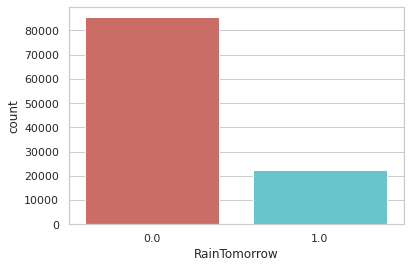

In [6]:
plt.rc("font", size=14)
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

sb.countplot(x='RainTomorrow', data=df, palette='hls')
plt.show()

In [7]:
X = df.loc[:, df.columns != 'RainTomorrow']
y = df.loc[:, df.columns == 'RainTomorrow']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['RainTomorrow'])

# Merge the dataframes to create a new 'balanced' dataframe.
new_df = os_data_X
new_df['RainTomorrow'] = os_data_y

# Check the data to ensure it is correct:
print("Length of oversampled data: ", len(os_data_X))
print("Number of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0]))
print("Number of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1]))
print("Proportion of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0])/len(os_data_X))
print("Proportion of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1])/len(os_data_X))
print(X_train.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Length of oversampled data:  136692
Number of RainTomorrow=0 in oversampled data:  68346
Number of RainTomorrow=1 in oversampled data:  68346
Proportion of RainTomorrow=0 in oversampled data:  0.5
Proportion of RainTomorrow=1 in oversampled data:  0.5
(86294, 61)


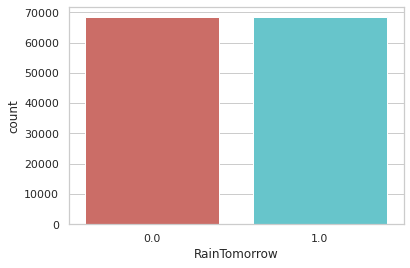

In [8]:
plt.rc("font", size=14)
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

sb.countplot(x='RainTomorrow', data=new_df, palette='hls')
plt.show()

In [9]:
#Using SelectKBest to get the top features!

from sklearn.feature_selection import SelectKBest, chi2
X = new_df.loc[:,new_df.columns!='RainTomorrow']
y = new_df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) 

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


# **Building classiciation table for unbalanced dataset.**

In [0]:
X = df[['Rainfall','Humidity3pm','RainToday']] 
y = df['RainTomorrow']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)


In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_ub = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_ub.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf_ub.predict(x_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# **Building classification table for balanced dataset.**

In [0]:
X = new_df[['Rainfall','Humidity3pm','RainToday']] 
y = new_df['RainTomorrow']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)


## 1.SVM Implement Model

In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# 2.SVM Classification Report

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

SVM Confusion Matrix

In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatDT = confusion_matrix(y_test,y_pred)


f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

# 3.SVM ROC

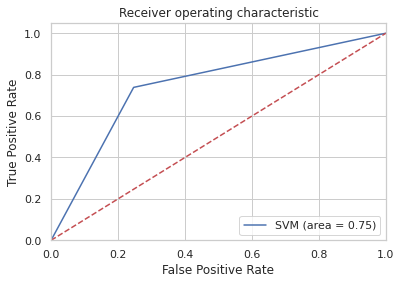

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.discrete.discrete_model as sml



svm_roc_auc = roc_auc_score(y_test, y_pred)

#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#fpr, tpr, thresholds = roc_curve(y_test_f, y_pred_f)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

